## A Jupyter Notebook to demonstrate the PSpy module

In [1]:
%%bash
echo current directory is:
echo
pwd
echo ------------------------------------------------------
echo content of the data directory is:
echo
ls ../../data/LockdownData/
echo ------------------------------------------------------
echo The module directory is:
echo
ls ../../

current directory is:

/home/fvanden/Documents/BAS/Python/PSpy/notebooks/Explaining
------------------------------------------------------
content of the data directory is:

050520dN.csv
050520RawC.csv
170320bdN.csv
170320bRawC.csv
170320dN.csv
170320RawC.csv
180320dN.csv
180320RawC.csv
190520dN.csv
190520RawC.csv
230420dN.csv
230420RawC.csv
240420dN.csv
240420RawC.csv
280720dN.csv
280720RawC.csv
LongTermB.csv
LongTermCdN.csv
LongTerm.csv
LongTermDdN.csv
LongTermEdN.csv
------------------------------------------------------
The module directory is:

data
doc
environment.yml
LICENSE
mypysmps
notebooks
README.md
requirements.txt


In [2]:
# import the Pspy module from the module directory
import sys
sys.path.append("./../..")

from mypysmps.io.read import read
from mypysmps.graph.psdisplay import PSDisplay

In [3]:
# read data into an instance of the particle sizer object
SMPS = read("../../data/LockdownData/050520dN.csv")

In [4]:
# possibility to explore the data and methods stored in instance
SMPS.createTimeDate()

In [5]:
type(SMPS)

mypysmps.core.smps.SMPS

In [6]:
SMPS.data.keys()

dict_keys(['normalised_number_concentration', 'variables', 'coordinates'])

In [7]:
# create a plotting object
display = PSDisplay(SMPS)

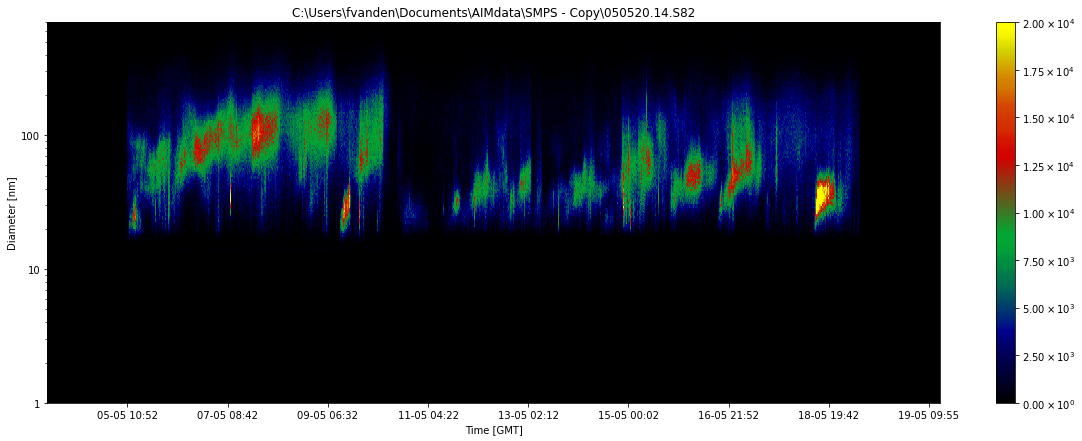

In [8]:
# display data
display.plot('normalised_number_concentration')

In [9]:
# concatenate data files
SMPS2 = read("../../data/LockdownData/190520dN.csv")
from mypysmps.util.ps_utils import stack_ps
concatenated = stack_ps(SMPS, SMPS2, message = False, fill_time = True)

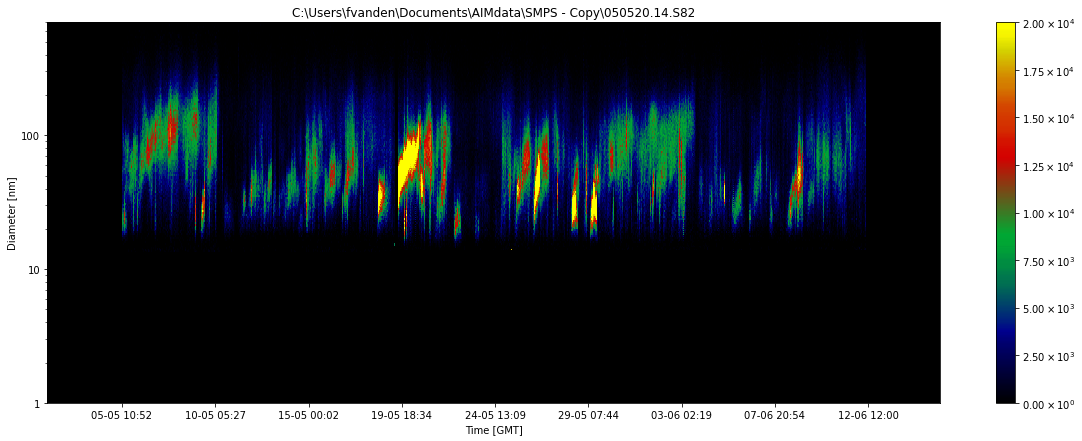

In [10]:
display_concatenated = PSDisplay(concatenated)
display_concatenated.plot('normalised_number_concentration')

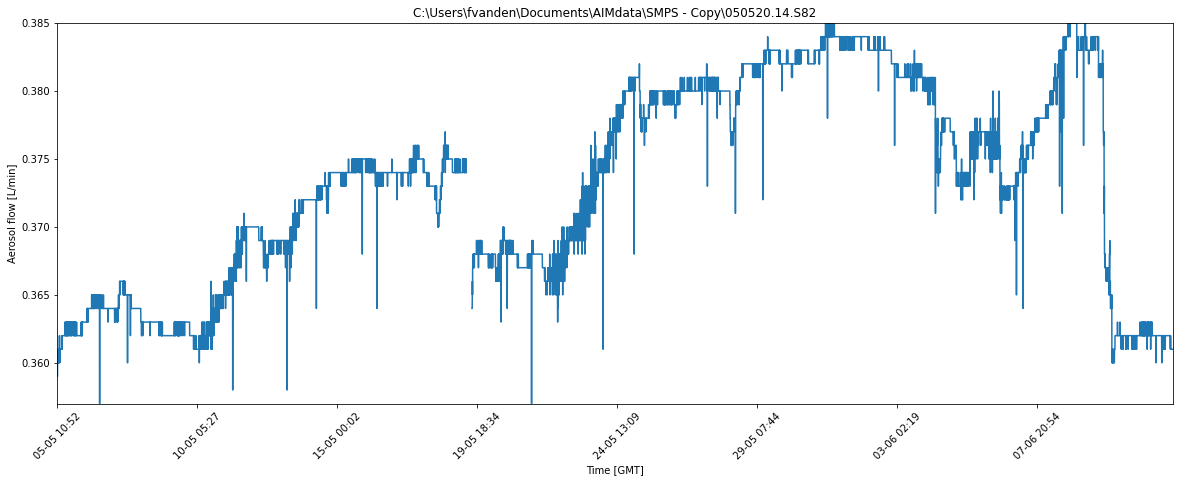

In [11]:
display_concatenated.timeLine('aerosol_flow') # ylim = (0.2, 0.4), title = 'Aerosol flow'

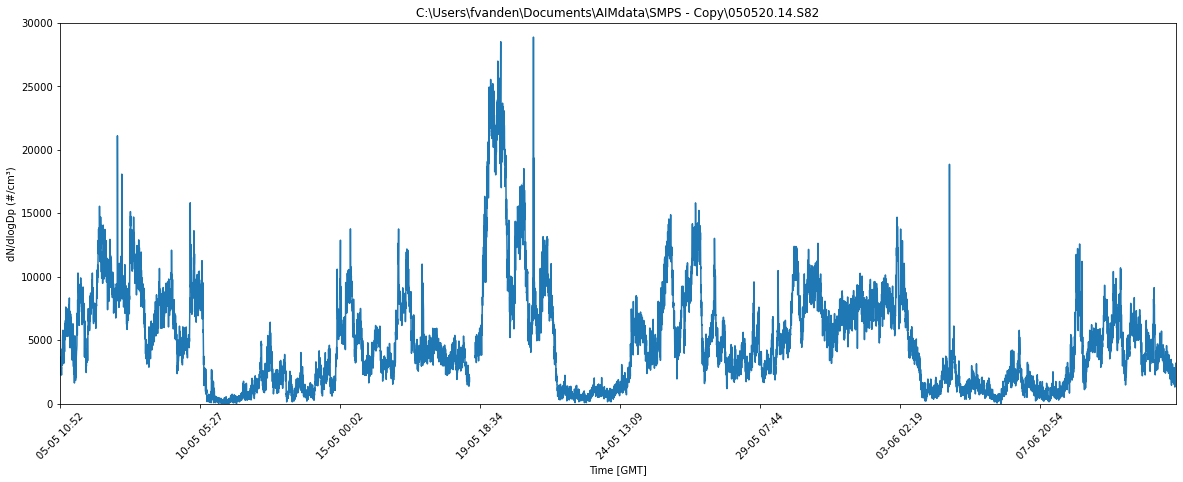

In [159]:
display_concatenated.timeLine('normalised_number_concentration', diameter = 50, ylim = (0,30000))

In [13]:
SMPS.diameter['data'][50]

82.0

## Filter data and add this to the object instance

In [132]:
# required imports
sys.path.append("/home/fvanden/Documents/EPFL/Python")
import copy
from mypysmps.util.fourierDemonstration import reduceDimFast

In [174]:
# filter data and add this to SMPS object
variable = 'normalised_number_concentration'
num = 50
fielddata = copy.deepcopy(concatenated.data[variable]['data'])
newdata = copy.deepcopy(fielddata[num, :])
np.asarray(newdata)[np.isnan(np.asarray(newdata))] = np.nanmean(newdata)
newdata = reduceDimFast(newdata, d = 100, Fs = 5 ) + np.nanmean(newdata)

/home/fvanden/anaconda3/envs/aerosol/lib/python3.7/site-packages/numpy/ma/core.py:3386: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
./../../mypysmps/core/smps.py:250: UserWarning: field name filtered_normalised_number_concentration already exists, field is overwritten...
  warnings.warn( ("field name %s already exists, field is overwritten...")%(fieldname) )


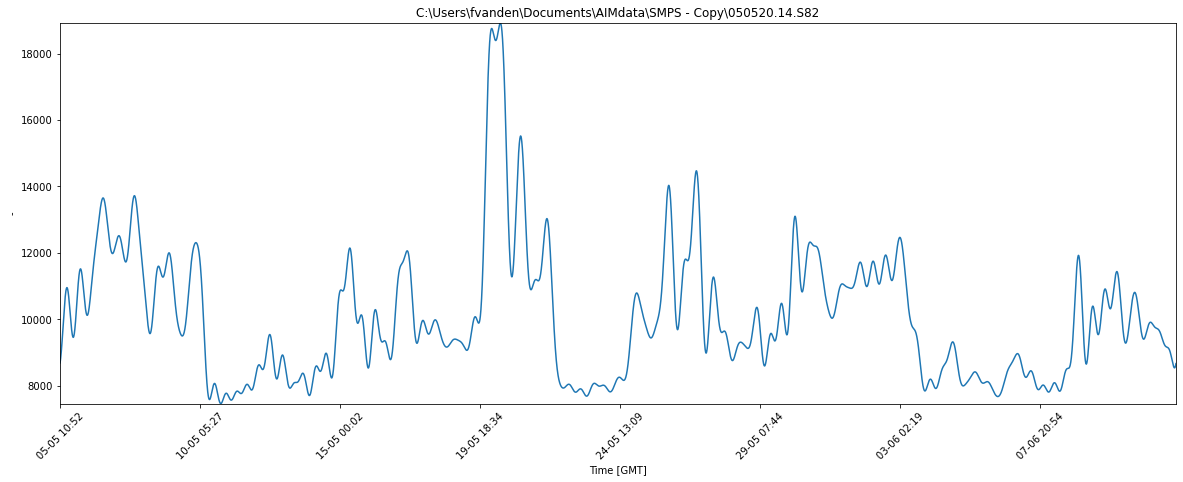

In [177]:
fielddata[num,:] = newdata
concatenated.add_field('filtered_normalised_number_concentration', fielddata)
newdisplay = PSDisplay(concatenated)
newdisplay.timeLine('filtered_normalised_number_concentration', diameter = num)

In [193]:
variable = 'normalised_number_concentration'
fielddata = copy.deepcopy(concatenated.data[variable]['data'])
for i in range(0, len(concatenated.diameter['data'])):
    # filter data and add this to SMPS object
    num = i
    newdata = copy.deepcopy(fielddata[num, :])
    np.asarray(newdata)[np.isnan(np.asarray(newdata))] = np.nanmean(newdata)
    newdata = reduceDimFast(newdata, d = 1000, Fs = 5 ) + np.nanmean(newdata)
    fielddata[num,:] = newdata
    
concatenated.add_field('filtered_normalised_number_concentration', fielddata)
newdisplay = PSDisplay(concatenated)

/home/fvanden/anaconda3/envs/aerosol/lib/python3.7/site-packages/numpy/ma/core.py:3386: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
./../../mypysmps/core/smps.py:250: UserWarning: field name filtered_normalised_number_concentration already exists, field is overwritten...
  warnings.warn( ("field name %s already exists, field is overwritten...")%(fieldname) )


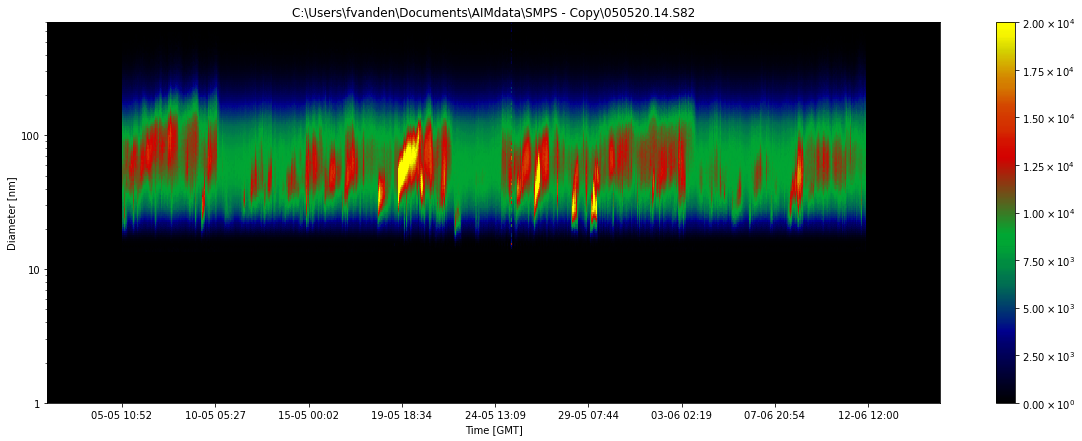

In [194]:
newdisplay.plot('filtered_normalised_number_concentration')

In [176]:
concatenated.data['filtered_normalised_number_concentration']

{'units': '-',
 'standard_name': 'filtered_normalised_number_concentration',
 'axis': '-',
 'valid_min': None,
 'valid_max': None,
 'comment': None,
 'data': masked_array(
   data=[[1232.835, 0.0, 0.0, ..., --, --, --],
         [949.433, 0.0, 0.0, ..., 0.0, 755.836, 0.0],
         [1370.818, 0.0, 0.0, ..., 0.0, 0.0, 242.568],
         ...,
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
         [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]],
   mask=[[False, False, False, ...,  True,  True,  True],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
   fill_value=1e+20)}

## For those more comfortable working in R

In [ ]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

In [ ]:
df = pd.DataFrame(SMPS.data['normalised_number_concentration']['data'])
with localconverter(ro.default_converter + pandas2ri.converter):
  r_from_pd_df = ro.conversion.py2rpy(df)

In [ ]:
r_from_pd_df.from_object

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
example <- c(1,2,3)
print(example)

In [ ]:
base = importr('base')

with localconverter(ro.default_converter + pandas2ri.converter):
  df_summary = base.summary(df)
print(df_summary)

### more information on working with R can be found on: https://rpy2.github.io/doc/v3.0.x/html/generated_rst/pandas.html